In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [69]:
# val = 0.065 # ~ minimum log(x) value...corresponds to low NTL
val = 255 # ~ maximum log(x) value...corresponds to high NTL

l_val = np.log(val)
e_val = np.exp(l_val)
print(l_val)
print(e_val)

5.541263545158426
254.99999999999991


In [78]:
val = np.log(255)
-0.00708*np.power(val, 4)

-6.675264538331095

In [73]:
val = np.log(255)
max_impervious = -0.00708*np.power(val, 4) + 0.1299*np.power(val, 3) + 0.7884*np.power(val, 2) + 6.951*val + 15.9
print(max_impervious)

TypeError: return arrays must be of ArrayType

In [30]:
x = np.arange(0, 2, 0.1)
logx = np.log(x)

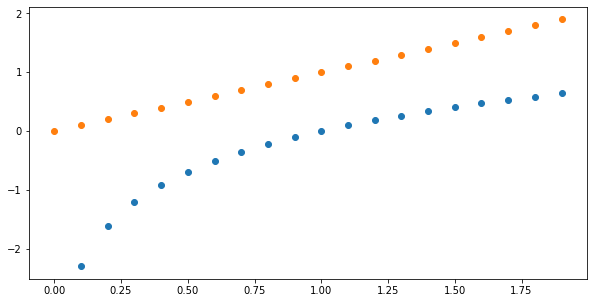

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, logx)
ax.scatter(x, np.exp(logx))
fig.show()